# Week 1

In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

import joblib  # for model persistence


In [5]:
# Load the dataset
df = pd.read_csv("irrigation_machine.csv")


In [6]:
# Preview the first few rows
df.head()


,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [7]:
# Dataset structure and info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [8]:
# View column names
df.columns


Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [9]:
# Drop unnecessary column
df = df.drop('Unnamed: 0', axis=1)


In [10]:
# Verify dataset after cleaning
df.head()


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [11]:
# Basic statistical summary
df.describe()


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


## Step 2: Define Features and Labels

In [12]:
# Define input features (sensor_0 to sensor_19)
X = df.iloc[:, 0:20]


In [13]:
# Define output labels (target irrigation parameters)
y = df.iloc[:, 20:]


In [14]:
# Sample of input features
X.sample(10)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
778,2.0,1.0,4.0,1.0,4.0,1.0,3.0,2.0,0.0,0.0,2.0,8.0,3.0,1.0,3.0,2.0,2.0,8.0,0.0,1.0
148,2.0,1.0,4.0,0.0,4.0,2.0,3.0,0.0,1.0,0.0,5.0,3.0,6.0,4.0,4.0,1.0,4.0,1.0,0.0,0.0
1174,1.0,3.0,2.0,3.0,3.0,3.0,1.0,4.0,5.0,2.0,1.0,5.0,5.0,5.0,2.0,1.0,4.0,1.0,6.0,3.0
1949,1.0,2.0,0.0,1.0,5.0,3.0,3.0,3.0,2.0,0.0,5.0,1.0,6.0,5.0,2.0,5.0,2.0,3.0,3.0,0.0
1862,1.0,0.0,4.0,1.0,2.0,1.0,5.0,4.0,2.0,0.0,3.0,0.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,0.0
1399,3.0,2.0,3.0,4.0,5.0,0.0,4.0,7.0,0.0,2.0,2.0,1.0,8.0,3.0,2.0,1.0,5.0,1.0,0.0,1.0
1315,2.0,1.0,5.0,1.0,3.0,5.0,2.0,0.0,3.0,1.0,4.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,5.0,0.0
224,3.0,0.0,2.0,0.0,3.0,1.0,3.0,8.0,0.0,0.0,3.0,6.0,3.0,1.0,3.0,0.0,7.0,3.0,0.0,1.0
1143,1.0,1.0,5.0,2.0,0.0,3.0,3.0,5.0,5.0,4.0,2.0,3.0,4.0,2.0,3.0,0.0,2.0,3.0,1.0,3.0
1760,2.0,1.0,3.0,4.0,5.0,2.0,3.0,4.0,0.0,5.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,4.0,2.0


In [15]:
# Sample of target labels
y.sample(10)


,parcel_0,parcel_1,parcel_2
1755,0,0,0
1525,0,0,0
510,0,1,0
803,1,1,1
992,0,1,0
843,1,1,1
1404,0,1,0
350,1,1,0
954,1,1,0
196,1,1,0


In [16]:
# Info about input and output data
X.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [17]:
# Display dimensions of features and labels
X.shape, y.shape


((2000, 20), (2000, 3))

# Week 2

In [18]:
# -------------------------------------
# STEP 1: SCALING FEATURES
# -------------------------------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled  # Scaled input features


array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

In [19]:
# -------------------------------------
# STEP 2: SPLITTING DATA
# -------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 20), (400, 20), (1600, 3), (400, 3))

In [20]:
# -------------------------------------
# STEP 3: TRAINING MODEL
# -------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Custom RandomForestClassifier with tuned hyperparameters
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Multi-label classifier
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

In [21]:
# -------------------------------------
# STEP 4: EVALUATING MODEL
# -------------------------------------
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

# Optional: Check total activations of each parcel
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())


📊 Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


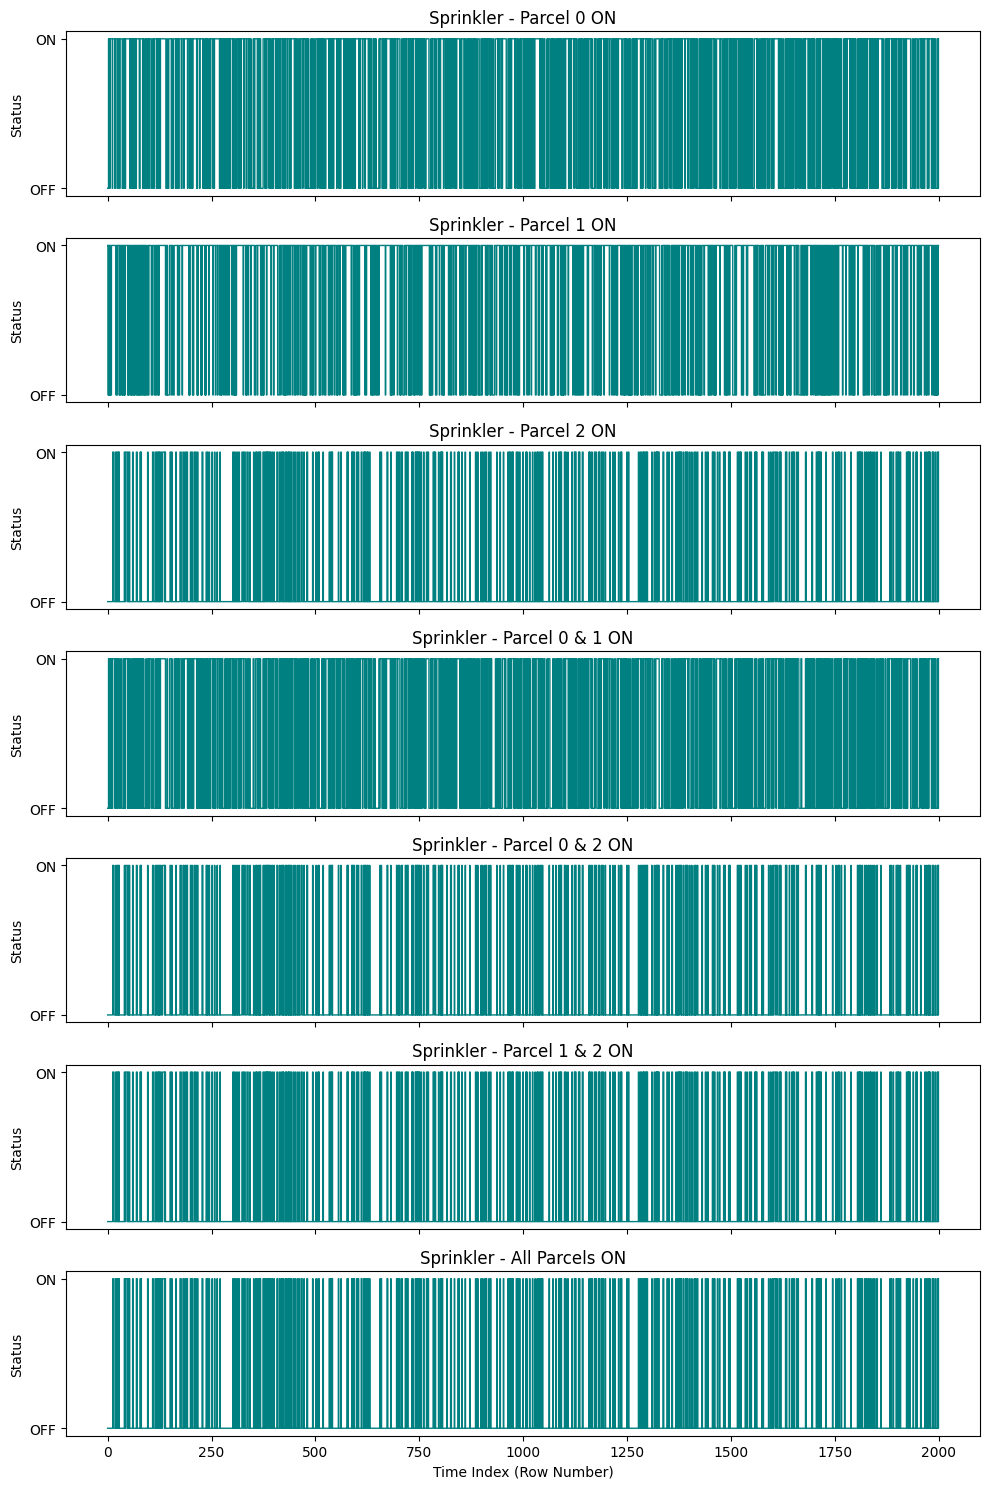

In [22]:
# -------------------------------------
# STEP 5: VISUALIZATIONS
# -------------------------------------
import matplotlib.pyplot as plt

# Parcel activation conditions
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

fig, axs = plt.subplots(nrows=len(conditions), figsize=(10, 15), sharex=True)

for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='teal')
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])

axs[-1].set_xlabel("Time Index (Row Number)")
plt.tight_layout()
plt.show()


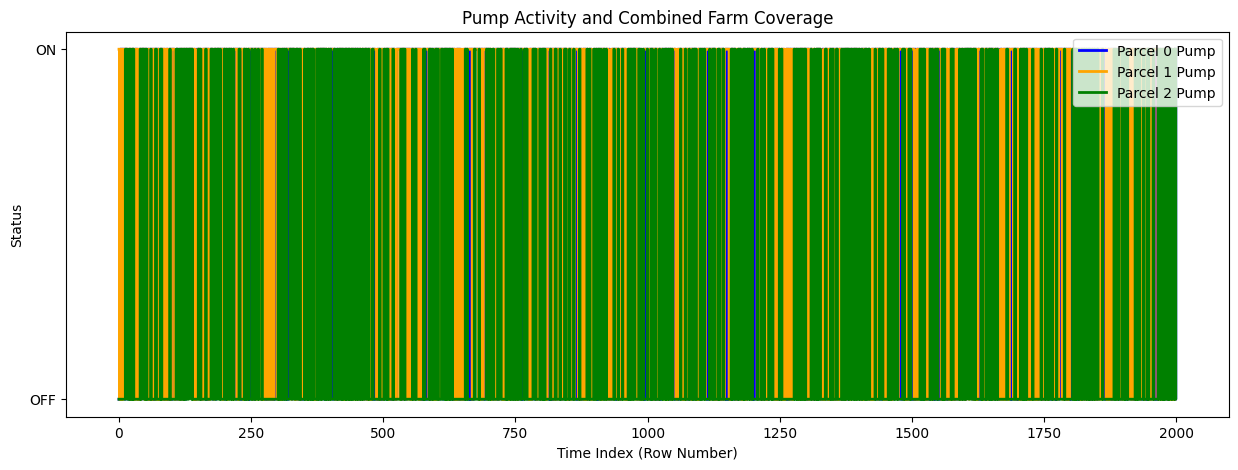

In [23]:
# Plot individual pumps with overlap
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green')

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()


In [24]:
# -------------------------------------
# STEP 6: SAVE THE TRAINED MODEL
# -------------------------------------
import joblib

joblib.dump(model, "Farm_Irrigation_System.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']